In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
amp_data = np.load('./data/amp_data.npz')['amp_data']

In [3]:
amp_data.shape

(33713280,)

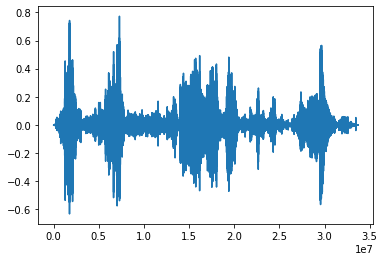

In [4]:
plt.plot(amp_data)
plt.show()

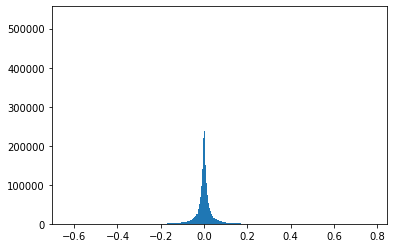

In [5]:
plt.hist(amp_data, bins=int(np.sqrt(len(amp_data))))
plt.show()

In [6]:
np.sqrt(np.var(amp_data)) # standard deviation 

0.04153175718671892

### reshape in Cx21

In [7]:
new_data_size= 21*(amp_data.shape[0]//21)
amp_data= amp_data[:new_data_size].reshape(-1,21)

In [8]:
amp_data.shape

(1605394, 21)

In [9]:
np.random.seed(235711) # set seed
np.random.shuffle(amp_data,)

train_size = int(amp_data.shape[0]*.7)
val_size = int(amp_data.shape[0]*.15)
test_size = amp_data.shape[0]-train_size-val_size

In [10]:
print(train_size,val_size,test_size)

1123775 240809 240810


In [11]:
train = amp_data[:train_size]
val =  amp_data[train_size:train_size+val_size]
test = amp_data[train_size+val_size:train_size+val_size+test_size]

In [12]:
test.shape[0]== test_size

True

In [13]:
train.shape

(1123775, 21)

In [14]:
X_shuf_train, y_shuf_train = train[:,:-1], train[:,-1]
X_shuf_val, y_shuf_val = val[:,:-1], val[:,-1]
X_shuf_test, y_shuf_test = test[:,:-1], test[:,-1]

In [15]:
X_shuf_test.shape

(240810, 20)

### curve fitting on a snippet of audio



In [16]:
time = np.arange(0,20)/20

In [17]:
time

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [18]:
19/20

0.95

In [19]:
example = X_shuf_train[0,:]
example_target = y_shuf_train[0]

In [20]:
example.shape

(20,)

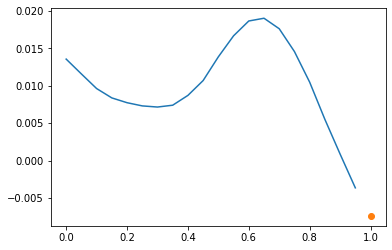

In [21]:
plt.plot(time,example)
plt.plot(1,example_target, 'o')
plt.show()

Fit linear regression

<ipython-input-40-2836b1a3166f>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef = np.linalg.lstsq(time_bias,example)[0].reshape(-1,1)
<ipython-input-40-2836b1a3166f>:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  quartic_coef = np.linalg.lstsq(phi,example)[0]


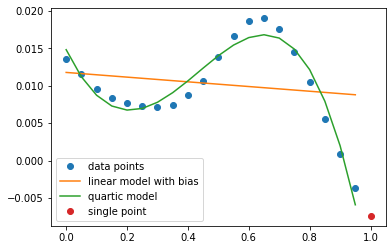

In [40]:
time_bias = np.c_[time, np.ones_like(time)]
coef = np.linalg.lstsq(time_bias,example)[0].reshape(-1,1)
linear_pred = np.matmul(coef.T,time_bias.T).ravel()

phi = np.c_[np.ones_like(time),time, time**2, time**3, time**4]
quartic_coef = np.linalg.lstsq(phi,example)[0]
quartic_pred = np.matmul(quartic_coef,phi.T)

plt.plot(time, example,'o', label="data points" )
plt.plot(time, linear_pred, label="linear model with bias")
plt.plot(time,quartic_pred, label="quartic model")
plt.plot(1,example_target, 'o', label="single point")
plt.legend()
plt.show()

In [48]:
def Phi( C:int, K:int):
    times = np.arange(0,1,1/C)
    array = np.zeros((C,K))
    for i,time in enumerate(times):
        array[i,:] = [time**k for k in range(5)]
    return array

In [50]:
Phi(20,5).shape

(20, 5)

In [56]:
Phi(20,5)[15]

array([1.        , 0.75      , 0.5625    , 0.421875  , 0.31640625])

In [58]:
15**4/20**4

0.31640625

In [59]:
def make_vv(C:int, K:int):
    Phi_result = Phi(C,K)
    phis= np.matmul(Phi_result,np.linalg.inv(np.matmul(Phi_result.T,Phi_result)))
    return np.matmul(phis, np.ones((K,1)))

In [60]:
make_vv(20,5)

array([[ 0.25      ],
       [-0.06578947],
       [-0.19736842],
       [-0.20252838],
       [-0.13093395],
       [-0.02412281],
       [ 0.08449432],
       [ 0.16963364],
       [ 0.21413829],
       [ 0.20897833],
       [ 0.15325077],
       [ 0.05417957],
       [-0.07288442],
       [-0.20446336],
       [-0.30895253],
       [-0.34662023],
       [-0.26960784],
       [-0.02192982],
       [ 0.46052632],
       [ 1.25      ]])